# **SPOTIFY DATA ANALYSIS**

The Data used on this analysis was requested to spotify platform. You can ask for the data of your user, and spotify will give you access to the files.

Can request the information at the official site of spotify

<a href="https://www.spotify.com">  Link to Spotify</a>

In [1]:
#Importing necessarries libraries
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import io
import requests
from collections import Counter
from itertools import product
import warnings
import re
warnings.filterwarnings('ignore')

## **STREAMING HISTORY**

Let´s inspect the streaming history of the user.

In [2]:
#Reading data from .json format, converting into a pandas object
request_zero = requests.get('https://raw.githubusercontent.com/jmbarrios27/SPOTIFY-USER-ANALYSIS/main/data/StreamingHistory0.json')
request_zero = pd.io.json.json_normalize(request_zero.json())

request_one = requests.get('https://raw.githubusercontent.com/jmbarrios27/SPOTIFY-USER-ANALYSIS/main/data/StreamingHistory1.json')
request_one = pd.io.json.json_normalize(request_one.json())

request_two = requests.get('https://raw.githubusercontent.com/jmbarrios27/SPOTIFY-USER-ANALYSIS/main/data/StreamingHistory2.json')
request_two = pd.io.json.json_normalize(request_two.json())

#Concat three files
music_search = pd.concat([request_zero , request_one , request_two])
music_search.head()

,artistName,endTime,msPlayed,trackName
0,Peter Base,2020-02-03 21:17,10730,Himno de España (Remix)
1,Ulpiano Vergara,2020-02-04 12:45,1088,Senderito de Amor
2,Gloria Estefan,2020-02-04 12:45,1109,Hoy - Spanish Version
3,Juice WRLD,2020-02-04 12:53,4074,Lucid Dreams
4,Gloria Estefan,2020-02-04 12:53,1984,Hoy - Spanish Version


**Here we have the three files, merged into one.**

In [3]:
#Let´s inspect the dataframe
print(f'Seacrh Dataframe shape is: {music_search.shape}')
print()
print(f'Seacrh Dataframe information is: {music_search.info()}')
print()
print(f'Seacrh Dataframe description is: {music_search.describe()}')
print()
print(f'Looking for NaN values in the dataframe: {music_search.isna().sum()}')
print()

Seacrh Dataframe shape is: (23370, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23370 entries, 0 to 3369
Data columns (total 4 columns):
artistName    23370 non-null object
endTime       23370 non-null object
msPlayed      23370 non-null int64
trackName     23370 non-null object
dtypes: int64(1), object(3)
memory usage: 912.9+ KB
Seacrh Dataframe information is: None

Seacrh Dataframe description is:            msPlayed
count  2.337000e+04
mean   7.076982e+04
std    1.111035e+05
min    0.000000e+00
25%    1.323000e+03
50%    5.085000e+03
75%    1.291475e+05
max    3.042585e+06

Looking for NaN values in the dataframe: artistName    0
endTime       0
msPlayed      0
trackName     0
dtype: int64



**No NaN values for the 23370 observations, let´s manipulate data format.**

In [4]:
search_sorted = music_search.sort_values(by='endTime')
print(f"The first Day of the dataframe is: {search_sorted['endTime'].head(1)}")
print("The last Day of the dataframe is: ",search_sorted['endTime'].tail(1))

The first Day of the dataframe is: 0    2020-02-03 21:17
Name: endTime, dtype: object
The last Day of the dataframe is:  3369    2021-02-04 18:52
Name: endTime, dtype: object


### **Data Augmentation**

In [5]:
#Converting endTime column into Datetime type date
music_search['endTime'] = pd.to_datetime(music_search['endTime'])

#Extracting month, date, and hour separately
#Creating new columns based on the time info
music_search['Month'] = music_search.endTime.dt.month
music_search['Day'] = music_search.endTime.dt.day
music_search['Hour'] = music_search.endTime.dt.hour

#Creating Seconds Column1
music_search['SecondsListened'] = music_search['msPlayed'] * 0.001
music_search['HoursListened'] =  music_search['SecondsListened'] * 0.000277778

#Dropping the msPlayed column 
music_search = music_search.drop(columns=['msPlayed'])

In [6]:
print('Final Result of the Dataframe')
music_search.head()

Final Result of the Dataframe


,artistName,endTime,trackName,Month,Day,Hour,SecondsListened,HoursListened
0,Peter Base,2020-02-03 21:17:00,Himno de España (Remix),2,3,21,10.730,0.002981
1,Ulpiano Vergara,2020-02-04 12:45:00,Senderito de Amor,2,4,12,1.088,0.000302
2,Gloria Estefan,2020-02-04 12:45:00,Hoy - Spanish Version,2,4,12,1.109,0.000308
3,Juice WRLD,2020-02-04 12:53:00,Lucid Dreams,2,4,12,4.074,0.001132
4,Gloria Estefan,2020-02-04 12:53:00,Hoy - Spanish Version,2,4,12,1.984,0.000551


#### **The 10 most listened artists**

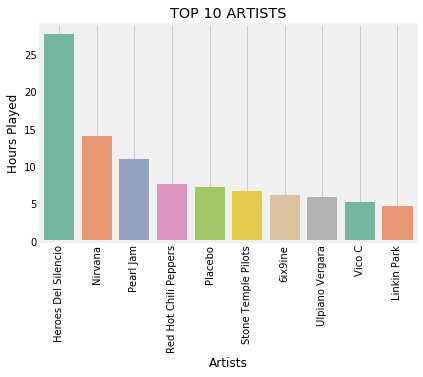

In [7]:
#Grouping by artist
most_listened = music_search.groupby(by='artistName').sum()
most_listened = most_listened.sort_values(by='HoursListened', ascending=False)
top_ten = most_listened.head(10)


plt.figure(figsize=(6,4))
sns.barplot(data=top_ten, x=top_ten.index, y='HoursListened',palette='Set2')
plt.xticks(rotation=90)
plt.title('TOP 10 ARTISTS')
plt.xlabel('Artists')
plt.ylabel('Hours Played')
plt.grid()
plt.show()

#### **The 10 least listened artists**

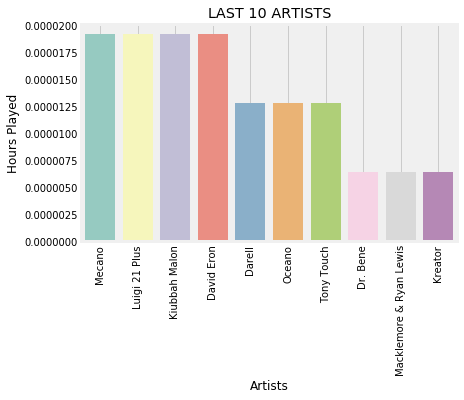

In [8]:
#Lets drop all the observations with 0.0 hours listened, because it means the song wasn´t listened at all
least_searched = music_search[music_search['HoursListened']!= 0]
least_searched = least_searched.groupby(by='artistName').sum()
least_searched = least_searched.sort_values(by='HoursListened',ascending=False)
least_searched = least_searched.tail(10)

plt.figure(figsize=(6,4))
sns.barplot(data=least_searched, x=least_searched.index, y='HoursListened',palette='Set3')
plt.xticks(rotation=90)
plt.title('LAST 10 ARTISTS')
plt.xlabel('Artists')
plt.ylabel('Hours Played')
plt.grid()
plt.show()

#### **10 most listened songs and the 10 least**

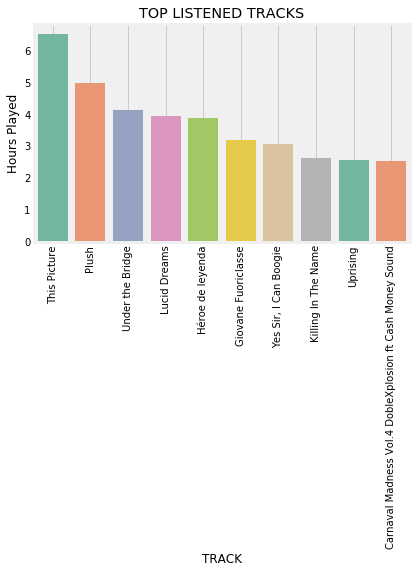

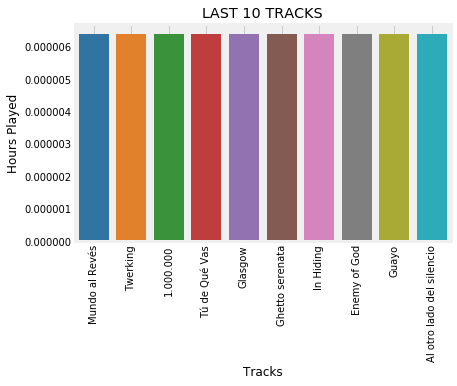

In [9]:
most_track = music_search.groupby(by='trackName').sum()
most_track = most_track.sort_values(by='HoursListened', ascending=False)
most_track = most_track.head(10)



plt.figure(figsize=(6,4))
sns.barplot(data=most_track, x=most_track.index, y='HoursListened',palette='Set2')
plt.xticks(rotation=90)
plt.title('TOP LISTENED TRACKS')
plt.xlabel('TRACK')
plt.ylabel('Hours Played')
plt.grid()
plt.show()

#Lets drop all the observations with 0.0 hours listened, because it means the song wasn´t listened at all
last_tracks = music_search[music_search['HoursListened']!= 0]
last_tracks = last_tracks.groupby(by='trackName').sum()
last_tracks = last_tracks.sort_values(by='HoursListened',ascending=False)
last_tracks = last_tracks.tail(10)

print()
plt.figure(figsize=(6,4))
sns.barplot(data=last_tracks, x=last_tracks.index, y='HoursListened',palette='tab10')
plt.xticks(rotation=90)
plt.title('LAST 10 TRACKS')
plt.xlabel('Tracks')
plt.ylabel('Hours Played')
plt.grid()
plt.show()

#### **how many hours of music were listened to per month?**

<Figure size 576x576 with 0 Axes>

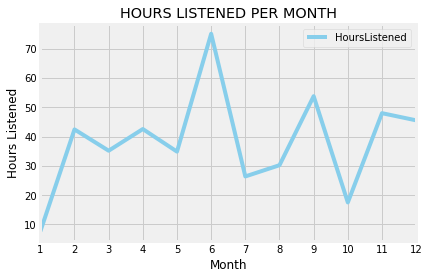

In [10]:
#Grouping by Month
month = music_search.groupby(by='Month').sum()
month = month.drop(columns=['Day','Hour','SecondsListened'])
plt.figure(figsize=(8,8))
month.plot(color='skyblue')
plt.xticks(month.index)
plt.title('HOURS LISTENED PER MONTH')
plt.ylabel('Hours Listened')
plt.show()

#### **how many hours of music were listened to per day of the month?**

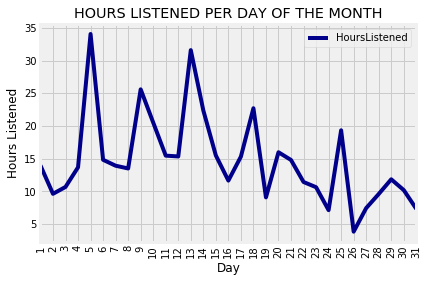

In [104]:
#Grouping Data by Day of the month
day = music_search.groupby(by='Day').sum()
day = day.drop(columns=['Month','Hour','SecondsListened'])

day.plot(color='darkblue')
plt.xticks(day.index, rotation=90)
plt.title('HOURS LISTENED PER DAY OF THE MONTH')
plt.ylabel('Hours Listened')
plt.show()

#### **how many hours of music were listened to per Hour of the Day?**

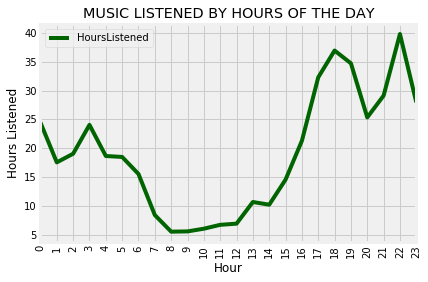

In [12]:
hour = music_search.groupby(by='Hour').sum()
hour = hour.drop(columns=['Month','Day','SecondsListened'])

hour.plot(color='darkgreen')
plt.xticks(hour.index, rotation=90)
plt.title('MUSIC LISTENED BY HOURS OF THE DAY')
plt.ylabel('Hours Listened')
plt.show()

## **SEARCH QUERIES**

In this section we are going to analyze the queries made.
The information is from the 8 of november 2020 

to february the first of  2021

In [13]:
search_url = "https://raw.githubusercontent.com/jmbarrios27/SPOTIFY-USER-ANALYSIS/main/data/SearchQueries.json"
search_url = requests.get(search_url)
search = pd.io.json.json_normalize(search_url.json())
search.head()

,platform,searchInteractionURIs,searchQuery,searchTime
0,IPHONE_ARM64,[spotify:track:6Zu3OBpTrTtVLYUsQ9WiD5],body a,2020-11-08T00:34:32.397Z[UTC]
1,IPHONE_ARM64,[spotify:album:3PYD8hPxxfm42nCVrhkoxS],falling soldiers dem,2020-11-08T16:21:50.700Z[UTC]
2,IPHONE_ARM64,"[spotify:artist:3ibTad5YzF0JWr5C5ikwkP, ]",osval,2020-11-08T23:30:36.876Z[UTC]
3,IPHONE_ARM64,[],cora,2020-11-08T23:33:51.178Z[UTC]
4,IPHONE_ARM64,[],s,2020-11-08T23:49:50.891Z[UTC]


**Data check**

In [14]:
print()
search.describe()
print()
search.info()
print()
search.isna().sum()
print()
search.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 4 columns):
platform                 238 non-null object
searchInteractionURIs    238 non-null object
searchQuery              238 non-null object
searchTime               238 non-null object
dtypes: object(4)
memory usage: 7.5+ KB




(238, 4)

**No NaN values**

### **Data Augmentation and Data cleaning**

In [15]:
#Function to clean Text
def iphoneClean(text):
    text = re.sub(r'ARM64',' ',text)
    text = re.sub(r'_', ' ',text)
    return text


def timeclean(timetext):
    timetext = re.sub(r'UTC', ' ',timetext)
    timetext = re.sub(r'Z', ' ',timetext)
    timetext = re.sub(r'T', ' ', timetext)
    timetext = re.sub(r' [ [ ] ]', ' ', timetext)
    return timetext.replace('[', '')

In [16]:
#Apllying functions
search['platform'] = search['platform'].apply(iphoneClean)
search['searchTime'] = search['searchTime'].apply(timeclean)

#converting searchTime into datetime data type
#Converting endTime column into Datetime type date
search['searchTime'] = pd.to_datetime(search['searchTime'])



#Extracting month, date, and hour separately
#Creating new columns based on the time info
search['Month'] = search.searchTime.dt.month
search['Day'] = search.searchTime.dt.day
search['Hour'] = search.searchTime.dt.hour

search.head()

,platform,searchInteractionURIs,searchQuery,searchTime,Month,Day,Hour
0,IPHONE,[spotify:track:6Zu3OBpTrTtVLYUsQ9WiD5],body a,2020-11-08 00:34:32.397,11,8,0
1,IPHONE,[spotify:album:3PYD8hPxxfm42nCVrhkoxS],falling soldiers dem,2020-11-08 16:21:50.700,11,8,16
2,IPHONE,"[spotify:artist:3ibTad5YzF0JWr5C5ikwkP, ]",osval,2020-11-08 23:30:36.876,11,8,23
3,IPHONE,[],cora,2020-11-08 23:33:51.178,11,8,23
4,IPHONE,[],s,2020-11-08 23:49:50.891,11,8,23


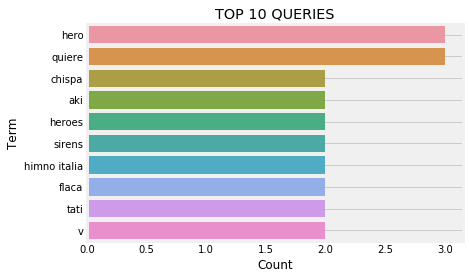

In [17]:
#Let´s see the most performed queries
queries = search['searchQuery'].value_counts()
queries = queries.head(10)
queries = pd.DataFrame(queries)

sns.barplot(data=queries, y=queries.index, x='searchQuery')
plt.title('TOP 10 QUERIES')
plt.ylabel('Term')
plt.xlabel('Count')
plt.grid()

##### **Platforms Usage**

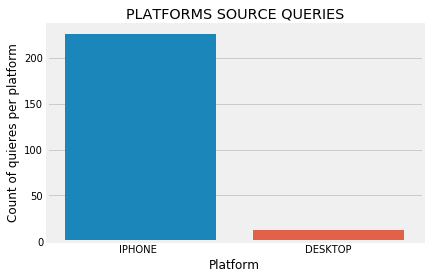

In [18]:
sns.countplot(data=search, x='platform')
plt.title('PLATFORMS SOURCE QUERIES')
plt.xlabel('Platform')
plt.ylabel('Count of quieres per platform')
plt.show()

##### **QUERIES MADE BY MONTH**

Text(0, 0.5, 'Count of Queries')

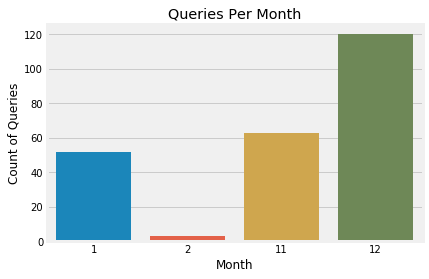

In [19]:
query_month = search
query_month['sum'] = 1
query_month = query_month.groupby(by='Month').sum()
sns.barplot(data=query_month,x=query_month.index, y='sum')
plt.title('Queries Per Month')
plt.ylabel('Count of Queries')

##### **QUERIES MADE BY DAY  OF THE MONTH**

Text(0, 0.5, 'Count of Queries')

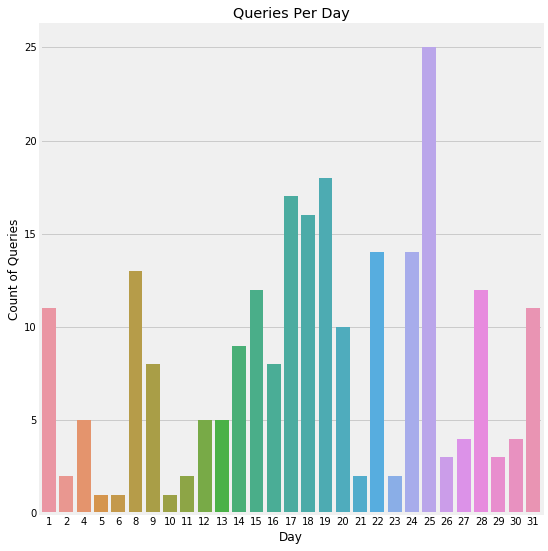

In [20]:
query_day = search
query_day['sum'] = 1
query_day = query_day.groupby(by='Day').sum()
query_day = query_day.drop(columns=['Month','Hour'])
plt.figure(figsize=(8,9))
sns.barplot(data=query_day,x=query_day.index, y='sum')
plt.title('Queries Per Day')
plt.ylabel('Count of Queries')

#### **QUERIES MADE BY HOUR  OF THE DAY**

Text(0, 0.5, 'Count of Queries')

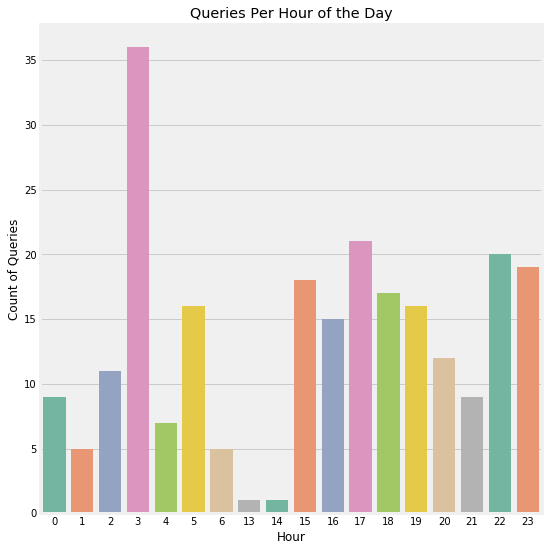

In [21]:
query_hour = search
query_hour['sum'] = 1
query_hour = query_hour.groupby(by='Hour').sum()
plt.figure(figsize=(8,9))
sns.barplot(data=query_hour,x=query_hour.index, y='sum',palette='Set2')
plt.title('Queries Per Hour of the Day')
plt.ylabel('Count of Queries')

## **MY LIBRARY**

Here is the information of the music libray of the account

In [22]:
#Read columns
library_url = 'https://raw.githubusercontent.com/jmbarrios27/SPOTIFY-USER-ANALYSIS/main/data/YourLibrary.json'
library = requests.get(library_url)
library = library.json()

for columns in library:
    print(columns)

tracks
albums
shows
episodes
bannedTracks
other


In [23]:
#Read Json file locally
path = 'C:\\Users\\Asus\\Desktop\\data\\YourLibrary.json'

with open(path) as f:
    tracks = pd.DataFrame(json.load(f)['tracks'])

tracks.head()


,album,artist,track
0,Live at Reading,Nirvana,Lounge Act - 1992/Live at Reading
1,Until Now,Swedish House Mafia,Save The World
2,1.22.03 Acoustic,Maroon 5,This Love - Acoustic
3,Luv Is Rage 2,Lil Uzi Vert,XO Tour Llif3
4,In Utero - 20th Anniversary Super Deluxe,Nirvana,Rape Me - Live & Loud


##### **Dataframe info check**

In [103]:
print()
tracks.info()
print()
print(f'Dataframe shape {tracks.shape}')
print()
track_count = 1
for column in tracks.columns:
    print('column',track_count, 'is',column)
    track_count = track_count + 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 3 columns):
album     257 non-null object
artist    257 non-null object
track     257 non-null object
dtypes: object(3)
memory usage: 6.1+ KB

Dataframe shape (257, 3)

column 1 is album
column 2 is artist
column 3 is track


### **FAVORTITE ALBUMS, ARTISTS AND TRACKS ON MY LIBRARY**

In [71]:
#Splitting by category
albums = tracks['album'].value_counts()
artists = tracks['artist'].value_counts()
track = tracks['track'].value_counts()

#Transforming into Pandas object
albums = pd.DataFrame(albums)
artists = pd.DataFrame(artists)
track = pd.DataFrame(track)

#renaming Columns
albums.columns = [['Album Played']]
artists.columns = [['Artists Played']]
track.columns = [['Track Played']]

#Filtering for the first 10 observations
albums = albums.head(10)
artists = artists.head(10)
track = track.head(10)

#### **Favorite Album**

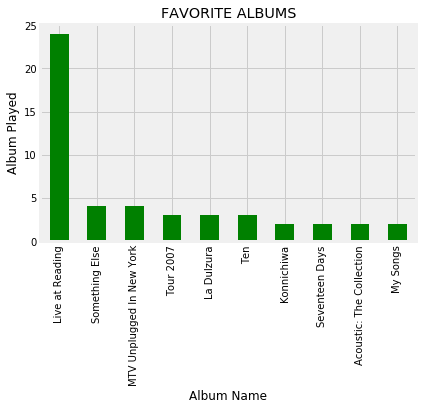

In [75]:
ax = albums.plot.bar(color='green')
ax.get_legend().remove()
plt.xticks(rotation=90)
plt.title('FAVORITE ALBUMS')
plt.xlabel('Album Name')
plt.ylabel('Album Played')
plt.show()

#### **Favorite  Artist or Band**

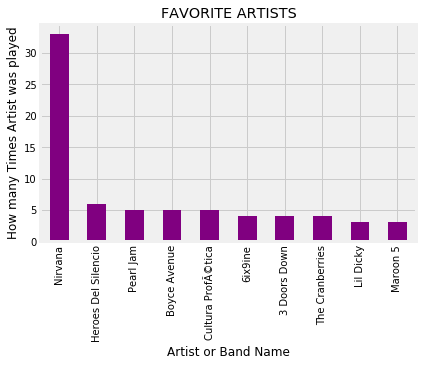

In [79]:
ax = artists.plot.bar(color='purple')
ax.get_legend().remove()
plt.xticks(rotation=90)
plt.title('FAVORITE ARTISTS')
plt.xlabel('Artist or Band Name')
plt.ylabel('How many Times Artist was played')
plt.show()

#### **Favorite Tracks**

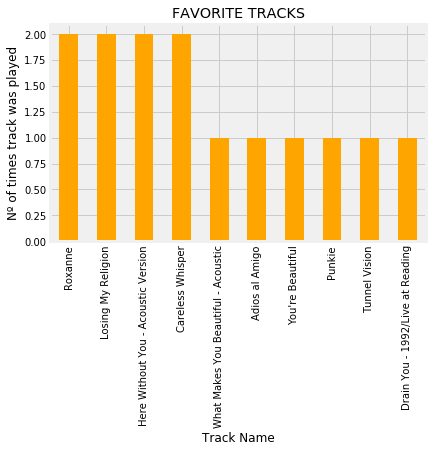

In [80]:
ax = track.plot.bar(color='orange')
ax.get_legend().remove()
plt.xticks(rotation=90)
plt.title('FAVORITE TRACKS')
plt.xlabel('Track Name')
plt.ylabel('Nº of times track was played')
plt.show()